In [1]:
#Netflix data > https://www.kaggle.com/datasets/shivamb/netflix-shows?resource=download

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go


import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('netflix_titles.csv')

In [3]:
df

show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb              NaN   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                                   NaN  United States   
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2     Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                   NaN            NaN   
4     Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   
...                                                 ...            ...   
8802  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...  United States   
8803                                                NaN            NaN   
8804  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...  United States   
8805  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...  United States   
8806  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...          India   

              date_added  release_year rating   duration  \
0     September 25, 2021          2020  PG-13     90 min   
1     September 24, 2021          2021  TV-MA  2 Seasons   
2     September 24, 2021          2021  TV-MA   1 Season   
3     September 24, 2021          2021  TV-MA   1 Season   
4     September 24, 2021          2021  TV-MA  2 Seasons   
...                  ...           ...    ...        ...   
8802   November 20, 2019          2007      R    158 min   
8803        July 1, 2019          2018  TV-Y7  2 Seasons   
8804    November 1, 2019          2009      R     88 min   
8805    January 11, 2020          2006     PG     88 min   
8806       March 2, 2019          2015  TV-14    111 min   

                                              listed_in  \
0                                         Documentaries   
1       International TV Shows, TV Dramas, TV Mysteries   
2     Crime TV Shows, International TV Shows, TV Act...   
3                                Docuseries, Reality TV   
4     International TV Shows, Romantic TV Shows, TV ...   
...                                                 ...   
8802                     Cult Movies, Dramas, Thrillers   
8803             Kids' TV, Korean TV Shows, TV Comedies   
8804                            Comedies, Horror Movies   
8805                 Children & Family Movies, Comedies   
8806     Dramas, International Movies, Music & Musicals   

                                            description  
0     As her father nears the end of his life, filmm...  
1     After crossing paths at a party, a Cape Town t...  
2     To protect his family from a powerful drug lor...  
3     Feuds, flirtations and toilet talk go down amo...  
4     In a city of coaching centers known to train I...  
...                                                 ...  
8802  A political cartoonist, a crime reporter and a...  
8803  While living alone in a spooky town, a young g...  
8804  Looking to survive in a world taken over by zo...  
8805  Dragged from civilian life, a former superhero...  
8806  A scrappy but poor boy worms his way into a ty...  

[8807 rows x 12 columns]

In [4]:
df.count()

show_id         8807
type            8807
title           8807
director        6173
cast            7982
country         7976
date_added      8797
release_year    8807
rating          8803
duration        8804
listed_in       8807
description     8807
dtype: int64

In [5]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [6]:
df.duplicated().sum()

0

In [7]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [9]:
df.isnull().sum().sort_values(ascending=False)

director        2634
country          831
cast             825
date_added        10
rating             4
duration           3
show_id            0
type               0
title              0
release_year       0
listed_in          0
description        0
dtype: int64

In [10]:
for i in df.columns:
    null_rate = df[i].isna().sum() / len(df) * 100 
    if null_rate > 0 :
        print("{} null rate: {}%".format(i,round(null_rate,2)))

director null rate: 29.91%
cast null rate: 9.37%
country null rate: 9.44%
date_added null rate: 0.11%
rating null rate: 0.05%
duration null rate: 0.03%


In [11]:
#5 columns have missing values, with Director missing 1/3 of the time


# Dealing with the missing data
# This is always scenario dependant, but in this case:
# replace blank countries with the mode (most common) country
# keep director as it could be interesting to look at a certain director's films
# keep cast as it could be interesting to look at a certain cast's films

In [12]:
# Replacments

df['country'] = df['country'].fillna(df['country'].mode()[0])


df['cast'].replace(np.nan, 'No Data',inplace  = True)
df['director'].replace(np.nan, 'No Data',inplace  = True)

# Drops

df.dropna(inplace=True)

# Drop Duplicates

df.drop_duplicates(inplace= True)

In [13]:
#working with date column

df['date_added'] = pd.to_datetime(df['date_added'], format='mixed')
df['month_added'] = df['date_added'].dt.month
df['month_name_added'] = df['date_added'].dt.month_name()
df['year_added'] = df['date_added'].dt.year



In [14]:
df['year_added'].astype(int)

0       2021
1       2021
2       2021
3       2021
4       2021
        ... 
8802    2019
8803    2019
8804    2019
8805    2020
8806    2019
Name: year_added, Length: 8790, dtype: int32

In [15]:
df

show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water          No Data   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans          No Data   
4         s5  TV Show           Kota Factory          No Data   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb          No Data   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                               No Data  United States   
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2     Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...  United States   
3                                               No Data  United States   
4     Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   
...                                                 ...            ...   
8802  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...  United States   
8803                                            No Data  United States   
8804  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...  United States   
8805  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...  United States   
8806  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...          India   

     date_added  release_year rating   duration  \
0    2021-09-25          2020  PG-13     90 min   
1    2021-09-24          2021  TV-MA  2 Seasons   
2    2021-09-24          2021  TV-MA   1 Season   
3    2021-09-24          2021  TV-MA   1 Season   
4    2021-09-24          2021  TV-MA  2 Seasons   
...         ...           ...    ...        ...   
8802 2019-11-20          2007      R    158 min   
8803 2019-07-01          2018  TV-Y7  2 Seasons   
8804 2019-11-01          2009      R     88 min   
8805 2020-01-11          2006     PG     88 min   
8806 2019-03-02          2015  TV-14    111 min   

                                              listed_in  \
0                                         Documentaries   
1       International TV Shows, TV Dramas, TV Mysteries   
2     Crime TV Shows, International TV Shows, TV Act...   
3                                Docuseries, Reality TV   
4     International TV Shows, Romantic TV Shows, TV ...   
...                                                 ...   
8802                     Cult Movies, Dramas, Thrillers   
8803             Kids' TV, Korean TV Shows, TV Comedies   
8804                            Comedies, Horror Movies   
8805                 Children & Family Movies, Comedies   
8806     Dramas, International Movies, Music & Musicals   

                                            description  month_added  \
0     As her father nears the end of his life, filmm...            9   
1     After crossing paths at a party, a Cape Town t...            9   
2     To protect his family from a powerful drug lor...            9   
3     Feuds, flirtations and toilet talk go down amo...            9   
4     In a city of coaching centers known to train I...            9   
...                                                 ...          ...   
8802  A political cartoonist, a crime reporter and a...           11   
8803  While living alone in a spooky town, a young g...            7   
8804  Looking to survive in a world taken over by zo...           11   
8805  Dragged from civilian life, a former superhero...            1   
8806  A scrappy but poor boy worms his way into a ty...            3   

     month_name_added  year_added  
0           September        2021  
1           September        2021  
2           September        2021  
3   

Text(0.5, 1.0, 'Type')

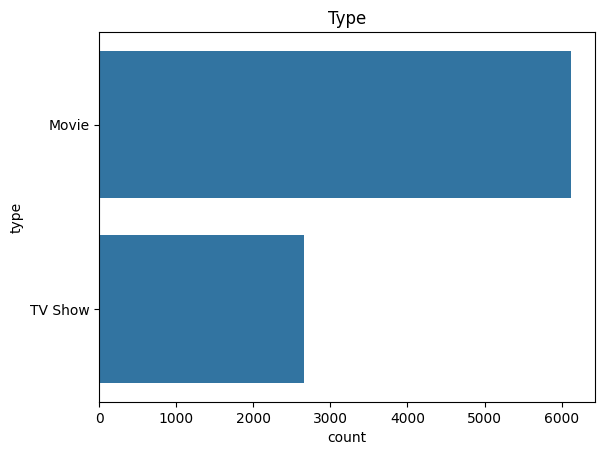

In [16]:
#Movie and TV Shows
sns.countplot(df['type'])
plt.title('Type')

In [17]:
from plotly.offline import iplot

# Group by content type (Movie or TV Show)
type_counts = df['type'].value_counts().reset_index()
type_counts.columns = ['type', 'count']

# Pie chart
fig = go.Figure(data=[
    go.Pie(
        labels=type_counts['type'],
        values=type_counts['count'],
        pull=[0.05, 0],
        marker=dict(colors=["#6ad49b", "#a678de"])
    )
])
fig.update_layout(title="Distribution of Movies and TV Shows", height=400)
iplot(fig)

In [18]:
#  Insight:

# Around 2/3 of the content on Netflix is Movies, while the remaining 1/3 are TV Shows. 
# This highlights that Netflix heavily prioritizes movies on its platform

In [19]:
# Content Addition Trend Over the Years

# Separate data by type
tv_shows = df[df["type"] == "TV Show"]
movies = df[df["type"] == "Movie"]

# Count by year added
tv_yearly = tv_shows['year_added'].value_counts().sort_index().reset_index()
tv_yearly.columns = ['year', 'count']

movie_yearly = movies['year_added'].value_counts().sort_index().reset_index()
movie_yearly.columns = ['year', 'count']

# Plot trend
fig = go.Figure()
fig.add_trace(go.Scatter(x=tv_yearly['year'], y=tv_yearly['count'], mode='lines+markers',
                         name='TV Shows', marker=dict(color="#a678de")))
fig.add_trace(go.Scatter(x=movie_yearly['year'], y=movie_yearly['count'], mode='lines+markers',
                         name='Movies', marker=dict(color="#6ad49b")))
fig.update_layout(title="Content Added Over the Years",
                  xaxis_title="Year Added",
                  yaxis_title="Number of Shows/Movies",
                  legend=dict(x=0.1, y=1.1, orientation="h"))
fig.show()


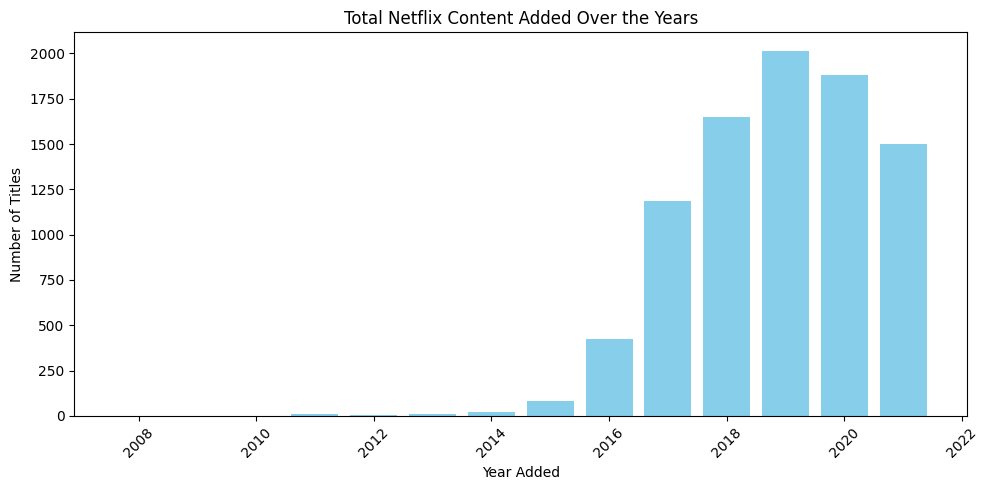

In [20]:
# Total Content Added Over the Years

import pandas as pd
import matplotlib.pyplot as plt

# Count number of shows added each year
content_by_year = df['year_added'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 5))
plt.bar(content_by_year.index, content_by_year.values, color='skyblue')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.title('Total Netflix Content Added Over the Years')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [21]:
# Netflix started significantly expanding its content library around 2013.
# Content addition peaked in 2019, marking it as the most aggressive expansion year.
# This trend indicates Netflix’s investment in broadening its global catalog to cater to a wider audience

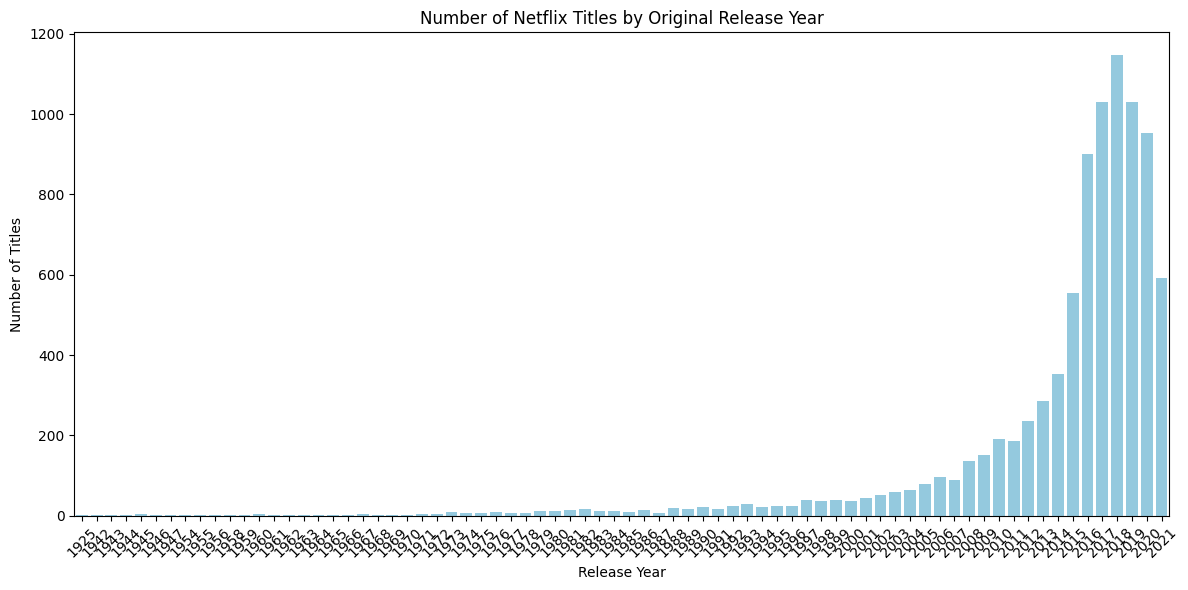

In [22]:
# Plotting content by original release year
plt.figure(figsize=(12, 6))
release_counts = df['release_year'].value_counts().sort_index()
sns.barplot(x=release_counts.index, y=release_counts.values, color='skyblue')

plt.title('Number of Netflix Titles by Original Release Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

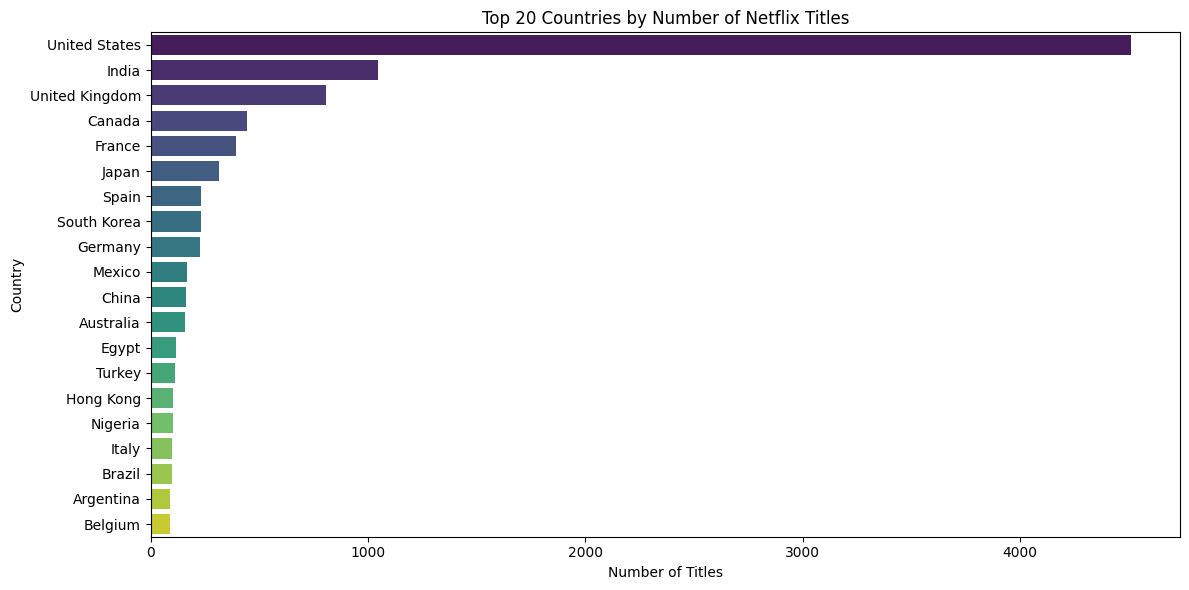

In [23]:
 # bar plot for the Top 20 countries with the most Netflix content
df['country'] = df['country'].fillna('Unknown')
countries = df['country'].str.split(',', expand=True).stack().str.strip()
top_countries = countries.value_counts().head(20)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(y=top_countries.index, x=top_countries.values, palette='viridis')

plt.title('Top 20 Countries by Number of Netflix Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

In [24]:
# the same above code on map of world
country_codes = {'afghanistan': 'AFG',
 'albania': 'ALB',
 'algeria': 'DZA',
 'american samoa': 'ASM',
 'andorra': 'AND',
 'angola': 'AGO',
 'anguilla': 'AIA',
 'antigua and barbuda': 'ATG',
 'argentina': 'ARG',
 'armenia': 'ARM',
 'aruba': 'ABW',
 'australia': 'AUS',
 'austria': 'AUT',
 'azerbaijan': 'AZE',
 'bahamas': 'BHM',
 'bahrain': 'BHR',
 'bangladesh': 'BGD',
 'barbados': 'BRB',
 'belarus': 'BLR',
 'belgium': 'BEL',
 'belize': 'BLZ',
 'benin': 'BEN',
 'bermuda': 'BMU',
 'bhutan': 'BTN',
 'bolivia': 'BOL',
 'bosnia and herzegovina': 'BIH',
 'botswana': 'BWA',
 'brazil': 'BRA',
 'british virgin islands': 'VGB',
 'brunei': 'BRN',
 'bulgaria': 'BGR',
 'burkina faso': 'BFA',
 'burma': 'MMR',
 'burundi': 'BDI',
 'cabo verde': 'CPV',
 'cambodia': 'KHM',
 'cameroon': 'CMR',
 'canada': 'CAN',
 'cayman islands': 'CYM',
 'central african republic': 'CAF',
 'chad': 'TCD',
 'chile': 'CHL',
 'china': 'CHN',
 'colombia': 'COL',
 'comoros': 'COM',
 'congo democratic': 'COD',
 'Congo republic': 'COG',
 'cook islands': 'COK',
 'costa rica': 'CRI',
 "cote d'ivoire": 'CIV',
 'croatia': 'HRV',
 'cuba': 'CUB',
 'curacao': 'CUW',
 'cyprus': 'CYP',
 'czech republic': 'CZE',
 'denmark': 'DNK',
 'djibouti': 'DJI',
 'dominica': 'DMA',
 'dominican republic': 'DOM',
 'ecuador': 'ECU',
 'egypt': 'EGY',
 'el salvador': 'SLV',
 'equatorial guinea': 'GNQ',
 'eritrea': 'ERI',
 'estonia': 'EST',
 'ethiopia': 'ETH',
 'falkland islands': 'FLK',
 'faroe islands': 'FRO',
 'fiji': 'FJI',
 'finland': 'FIN',
 'france': 'FRA',
 'french polynesia': 'PYF',
 'gabon': 'GAB',
 'gambia, the': 'GMB',
 'georgia': 'GEO',
 'germany': 'DEU',
 'ghana': 'GHA',
 'gibraltar': 'GIB',
 'greece': 'GRC',
 'greenland': 'GRL',
 'grenada': 'GRD',
 'guam': 'GUM',
 'guatemala': 'GTM',
 'guernsey': 'GGY',
 'guinea-bissau': 'GNB',
 'guinea': 'GIN',
 'guyana': 'GUY',
 'haiti': 'HTI',
 'honduras': 'HND',
 'hong kong': 'HKG',
 'hungary': 'HUN',
 'iceland': 'ISL',
 'india': 'IND',
 'indonesia': 'IDN',
 'iran': 'IRN',
 'iraq': 'IRQ',
 'ireland': 'IRL',
 'isle of man': 'IMN',
 'israel': 'ISR',
 'italy': 'ITA',
 'jamaica': 'JAM',
 'japan': 'JPN',
 'jersey': 'JEY',
 'jordan': 'JOR',
 'kazakhstan': 'KAZ',
 'kenya': 'KEN',
 'kiribati': 'KIR',
 'north korea': 'PRK',
 'south korea': 'KOR',
 'kosovo': 'KSV',
 'kuwait': 'KWT',
 'kyrgyzstan': 'KGZ',
 'laos': 'LAO',
 'latvia': 'LVA',
 'lebanon': 'LBN',
 'lesotho': 'LSO',
 'liberia': 'LBR',
 'libya': 'LBY',
 'liechtenstein': 'LIE',
 'lithuania': 'LTU',
 'luxembourg': 'LUX',
 'macau': 'MAC',
 'macedonia': 'MKD',
 'madagascar': 'MDG',
 'malawi': 'MWI',
 'malaysia': 'MYS',
 'maldives': 'MDV',
 'mali': 'MLI',
 'malta': 'MLT',
 'marshall islands': 'MHL',
 'mauritania': 'MRT',
 'mauritius': 'MUS',
 'mexico': 'MEX',
 'micronesia': 'FSM',
 'moldova': 'MDA',
 'monaco': 'MCO',
 'mongolia': 'MNG',
 'montenegro': 'MNE',
 'morocco': 'MAR',
 'mozambique': 'MOZ',
 'namibia': 'NAM',
 'nepal': 'NPL',
 'netherlands': 'NLD',
 'new caledonia': 'NCL',
 'new zealand': 'NZL',
 'nicaragua': 'NIC',
 'nigeria': 'NGA',
 'niger': 'NER',
 'niue': 'NIU',
 'northern mariana islands': 'MNP',
 'norway': 'NOR',
 'oman': 'OMN',
 'pakistan': 'PAK',
 'palau': 'PLW',
 'panama': 'PAN',
 'papua new guinea': 'PNG',
 'paraguay': 'PRY',
 'peru': 'PER',
 'philippines': 'PHL',
 'poland': 'POL',
 'portugal': 'PRT',
 'puerto rico': 'PRI',
 'qatar': 'QAT',
 'romania': 'ROU',
 'russia': 'RUS',
 'rwanda': 'RWA',
 'saint kitts and nevis': 'KNA',
 'saint lucia': 'LCA',
 'saint martin': 'MAF',
 'saint pierre and miquelon': 'SPM',
 'saint vincent and the grenadines': 'VCT',
 'samoa': 'WSM',
 'san marino': 'SMR',
 'sao tome and principe': 'STP',
 'saudi arabia': 'SAU',
 'senegal': 'SEN',
 'serbia': 'SRB',
 'seychelles': 'SYC',
 'sierra leone': 'SLE',
 'singapore': 'SGP',
 'sint maarten': 'SXM',
 'slovakia': 'SVK',
 'slovenia': 'SVN',
 'solomon islands': 'SLB',
 'somalia': 'SOM',
 'south africa': 'ZAF',
 'south sudan': 'SSD',
 'spain': 'ESP',
 'sri lanka': 'LKA',
 'sudan': 'SDN',
 'suriname': 'SUR',
 'swaziland': 'SWZ',
 'sweden': 'SWE',
 'switzerland': 'CHE',
 'syria': 'SYR',
 'taiwan': 'TWN',
 'tajikistan': 'TJK',
 'tanzania': 'TZA',
 'thailand': 'THA',
 'timor-leste': 'TLS',
 'togo': 'TGO',
 'tonga': 'TON',
 'trinidad and tobago': 'TTO',
 'tunisia': 'TUN',
 'turkey': 'TUR',
 'turkmenistan': 'TKM',
 'tuvalu': 'TUV',
 'uganda': 'UGA',
 'ukraine': 'UKR',
 'united arab emirates': 'ARE',
 'united kingdom': 'GBR',
 'united states': 'USA',
 'uruguay': 'URY',
 'uzbekistan': 'UZB',
 'vanuatu': 'VUT',
 'venezuela': 'VEN',
 'vietnam': 'VNM',
 'virgin islands': 'VGB',
 'west bank': 'WBG',
 'yemen': 'YEM',
 'zambia': 'ZMB',
 'zimbabwe': 'ZWE'}

## countries 
from collections import Counter
colorscale = ["#f7fbff", "#ebf3fb", "#deebf7", "#d2e3f3", "#c6dbef", "#b3d2e9", "#9ecae1",
    "#85bcdb", "#6baed6", "#57a0ce", "#4292c6", "#3082be", "#2171b5", "#1361a9",
    "#08519c", "#0b4083", "#08306b"
]
    
def geoplot(ddf):
    country_with_code, country = {}, {}
    shows_countries = ", ".join(ddf['country'].dropna()).split(", ")
    for c,v in dict(Counter(shows_countries)).items():
        code = ""
        if c.lower() in country_codes:
            code = country_codes[c.lower()]
        country_with_code[code] = v
        country[c] = v

    data = [dict(
            type = 'choropleth',
            locations = list(country_with_code.keys()),
            z = list(country_with_code.values()),
            colorscale = [[0,"rgb(5, 10, 172)"],[0.65,"rgb(40, 60, 190)"],[0.75,"rgb(70, 100, 245)"],\
                        [0.80,"rgb(90, 120, 245)"],[0.9,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
            autocolorscale = False,
            reversescale = True,
            marker = dict(
                line = dict (
                    color = 'gray',
                    width = 0.5
                ) ),
            colorbar = dict(
                autotick = False,
                title = ''),
          ) ]

    layout = dict(
        title = '',
        geo = dict(
            showframe = False,
            showcoastlines = False,
            projection = dict(
                type = 'Mercator'
            )
        )
    )

    fig = dict( data=data, layout=layout )
    iplot( fig, validate=False, filename='d3-world-map' )
    return country

country_vals = geoplot(df)
tabs = Counter(country_vals).most_common(25)

labels = [_[0] for _ in tabs][::-1]
values = [_[1] for _ in tabs][::-1]
trace1 = go.Bar(y=labels, x=values, orientation="h", name="", marker=dict(color="#a678de"))

data = [trace1]
layout = go.Layout(title="Countries with most content", height=700, legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

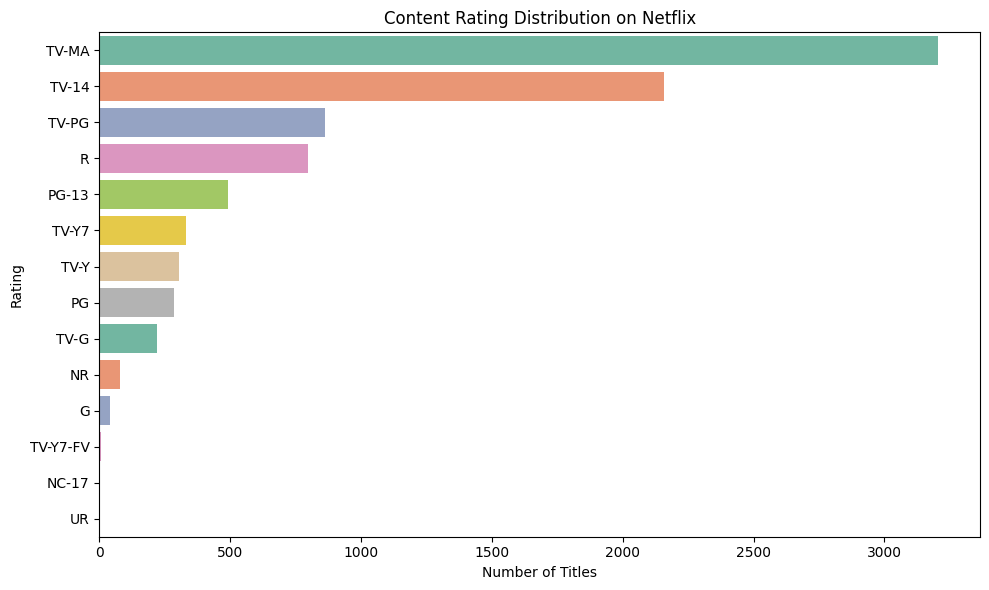

In [25]:
 # Content Rating Distribution on Netflix:

df['rating'] = df['rating'].fillna('Unknown')

# Count and sort ratings
rating_counts = df['rating'].value_counts().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=rating_counts.values, y=rating_counts.index, palette='Set2')

plt.title('Content Rating Distribution on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Rating')
plt.tight_layout()
plt.show()

In [26]:
# Some of the oldest movies on Netflix
small = df.sort_values("release_year", ascending = True)
small = small[small['duration'] != ""]
small[['title', "release_year"]][:15]

title  release_year
4250                 Pioneers: First Women Filmmakers*          1925
7790                                    Prelude to War          1942
8205                              The Battle of Midway          1942
8763                   WWII: Report from the Aleutians          1943
8739                Why We Fight: The Battle of Russia          1943
8660     Undercover: How to Operate Behind Enemy Lines          1943
8419  The Memphis Belle: A Story of a\nFlying Fortress          1944
8640                                  Tunisian Victory          1944
8436                                 The Negro Soldier          1944
7575                          Nazi Concentration Camps          1945
1331               Five Came Back: The Reference Films          1945
7930                                        San Pietro          1945
7219                           Know Your Enemy - Japan          1945
7294                                Let There Be Light          1946
7743               Pioneers of African-American Cinema          1946

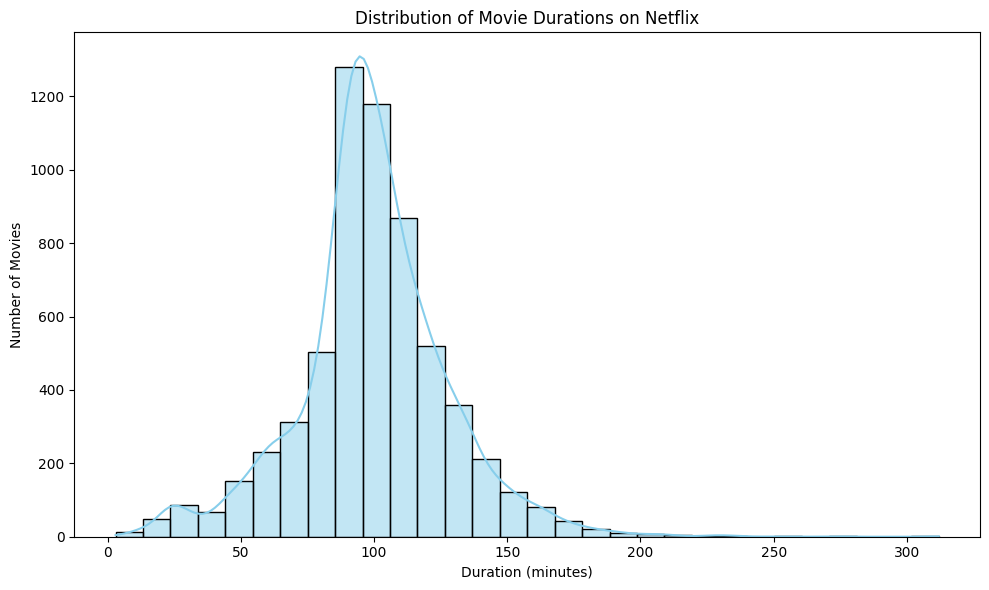

In [27]:
#distribution of movie duration:

movies_df = df[df['type'] == 'Movie'].copy()

# Extract numeric duration (in minutes)
movies_df['duration_minutes'] = movies_df['duration'].str.extract('(\d+)').astype(float)

# Drop missing durations
movies_df = movies_df.dropna(subset=['duration_minutes'])

# Plot
plt.figure(figsize=(10, 6))
sns.histplot(movies_df['duration_minutes'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Movie Durations on Netflix")
plt.xlabel("Duration (minutes)")
plt.ylabel("Number of Movies")
plt.tight_layout()
plt.show()

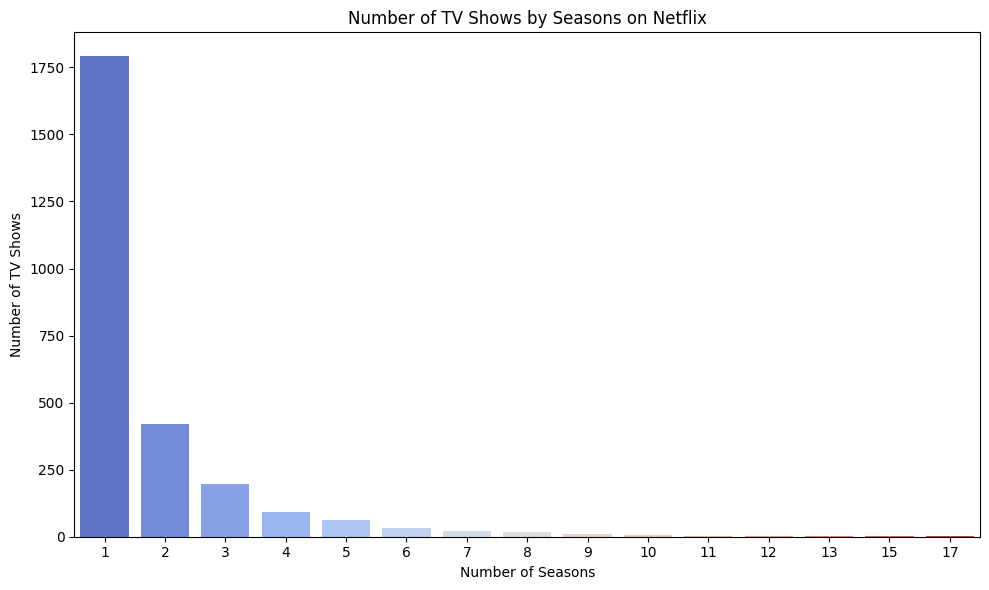

In [28]:
 # the distribution of TV Shows by number of seasons on Netflix
# Filter TV Shows
tv_shows_df = df[df['type'] == 'TV Show'].copy()

# Extract number of seasons (numeric)
tv_shows_df['seasons'] = tv_shows_df['duration'].str.extract('(\d+)').astype(float)

# Drop missing values
tv_shows_df = tv_shows_df.dropna(subset=['seasons'])

# Count number of shows by season count
season_counts = tv_shows_df['seasons'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=season_counts.index.astype(int), y=season_counts.values, palette='coolwarm')
plt.title('Number of TV Shows by Seasons on Netflix')
plt.xlabel('Number of Seasons')
plt.ylabel('Number of TV Shows')
plt.tight_layout()
plt.show()

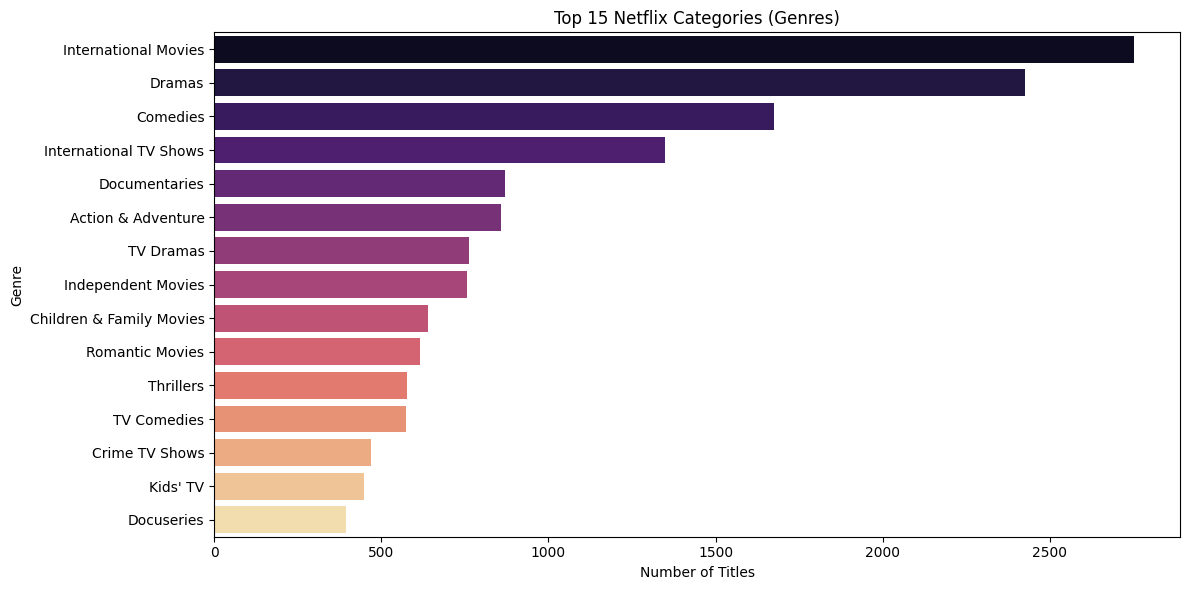

In [29]:
# What are the top Categories/genres?

genres = df['listed_in'].str.split(',').explode().str.strip()

# Count the genres and get top 15
top_genres = genres.value_counts().head(15)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='magma')

plt.title('Top 15 Netflix Categories (Genres)')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

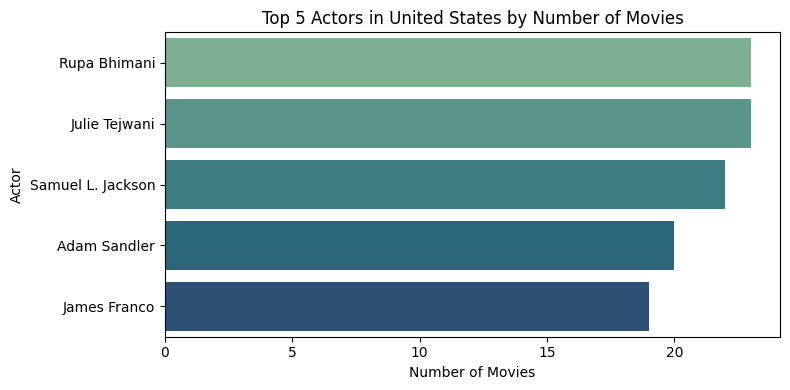

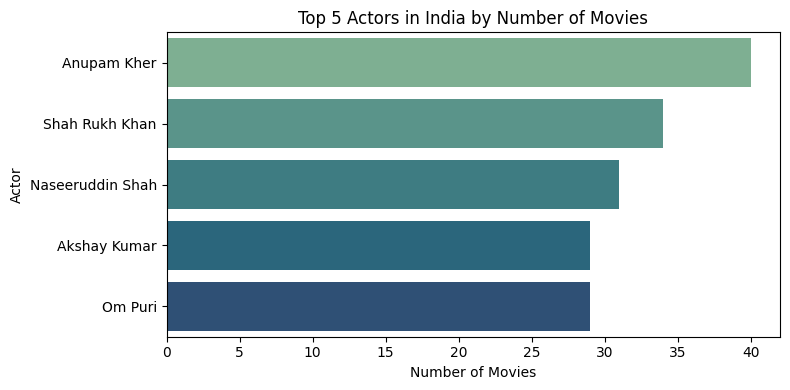

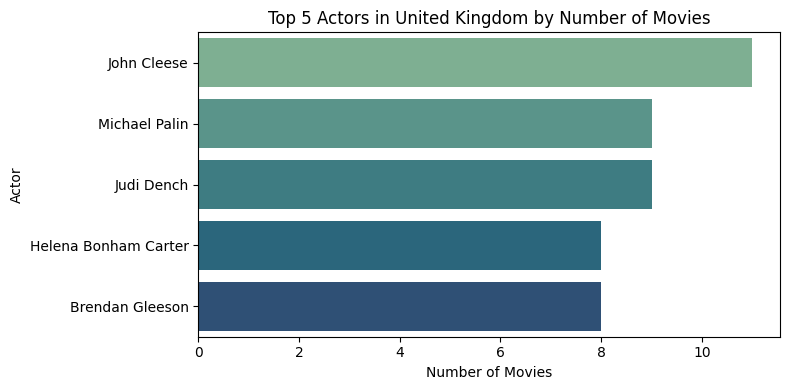

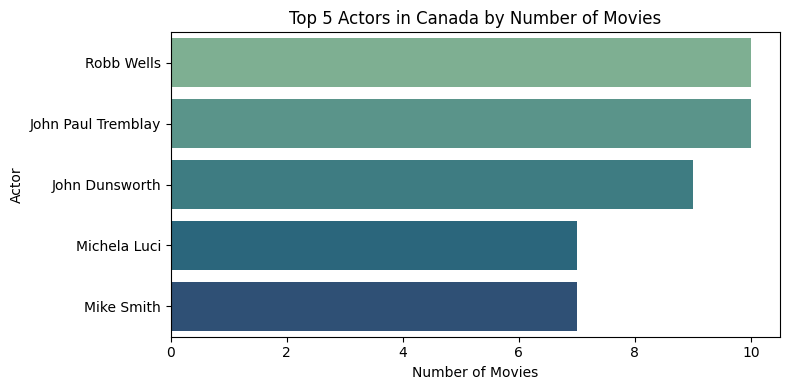

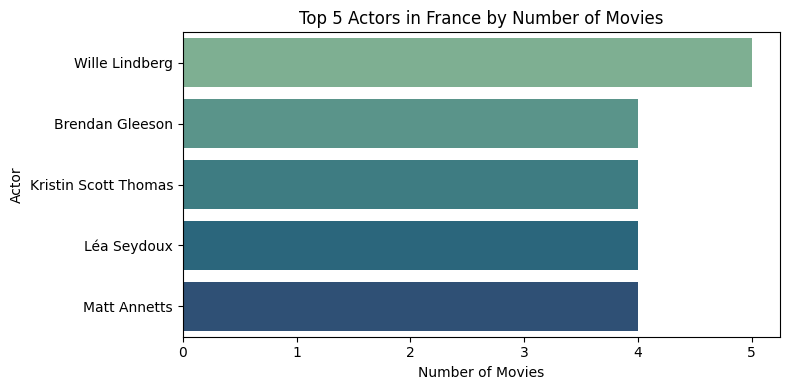

In [30]:
# Top Actors on Netflix with Most Movies

movies_df = df[(df['type'] == 'Movie') & df['country'].notna() & df['cast'].notna()].copy()

movies_df['country'] = movies_df['country'].str.split(',').apply(lambda x: [c.strip() for c in x])
movies_df = movies_df.explode('country')

movies_df['cast'] = movies_df['cast'].str.split(',').apply(lambda x: [a.strip() for a in x])
movies_df = movies_df.explode('cast')

# Remove empty or 'No Data' actor entries
movies_df = movies_df[movies_df['cast'].str.lower().replace('', pd.NA).notna()]
movies_df = movies_df[movies_df['cast'].str.lower() != 'no data']

top_countries = movies_df['country'].value_counts().head(5).index.tolist()

actor_country_counts = movies_df.groupby(['country', 'cast']).size().reset_index(name='movie_count')

for country in top_countries:
    data = actor_country_counts[actor_country_counts['country'] == country].sort_values(by='movie_count', ascending=False).head(5)
    plt.figure(figsize=(8, 4))
    sns.barplot(x='movie_count', y='cast', data=data, palette='crest')
    plt.title(f'Top 5 Actors in {country} by Number of Movies')
    plt.xlabel('Number of Movies')
    plt.ylabel('Actor')
    plt.tight_layout()
    plt.show()

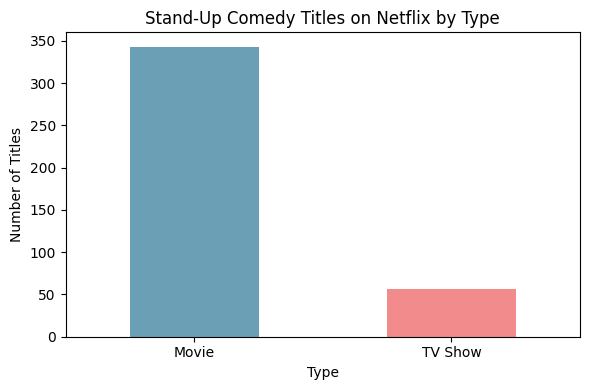

In [31]:
# Stand-Up Comedy titles on Netflix, based on the listed_in column which contains genres/categories

standup_df = df[df['listed_in'].str.contains('Stand-Up Comedy', case=False, na=False)]

# Count by type (Movie or TV Show)
standup_counts = standup_df['type'].value_counts()

# Plot
plt.figure(figsize=(6,4))
standup_counts.plot(kind='bar', color=['#6a9fb5', '#f28c8c'])
plt.title('Stand-Up Comedy Titles on Netflix by Type')
plt.xlabel('Type')
plt.ylabel('Number of Titles')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

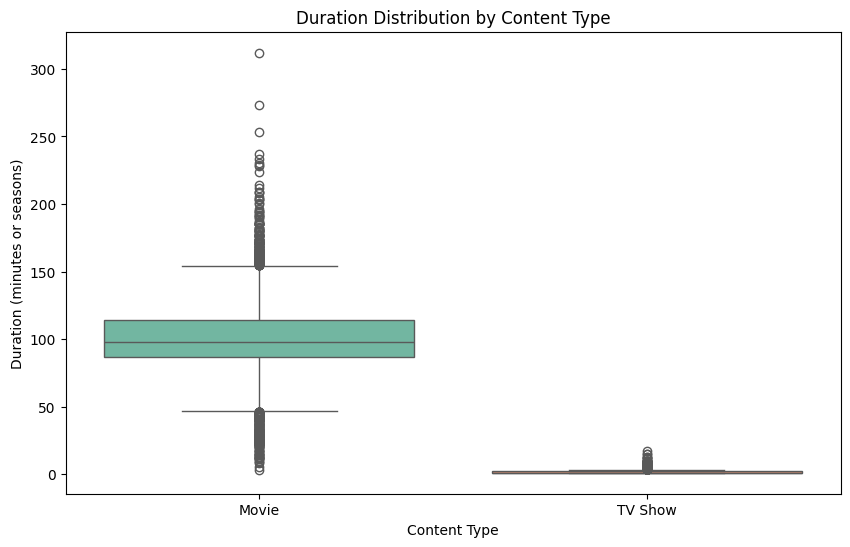

In [32]:
# How do durations of Movies and TV Shows differ?

# Extract numeric duration for Movies and seasons for TV Shows
df['duration_num'] = df['duration'].str.extract('(\d+)').astype(float)

plt.figure(figsize=(10,6))
sns.boxplot(x='type', y='duration_num', data=df, palette='Set2')
plt.title('Duration Distribution by Content Type')
plt.xlabel('Content Type')
plt.ylabel('Duration (minutes or seasons)')
plt.show()

# Insight:
# Movies have a wide duration range mostly between 60-150 minutes, while TV Shows show season counts mostly between 1 and 5.

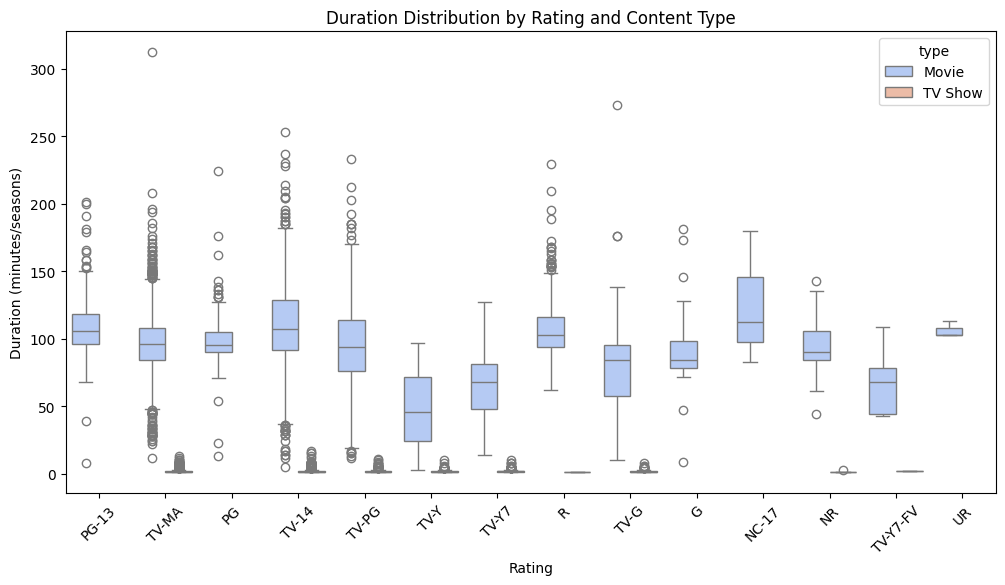

In [33]:
# How do duration and rating vary by content type?

plt.figure(figsize=(12,6))
sns.boxplot(x='rating', y='duration_num', hue='type', data=df, palette='coolwarm')
plt.title('Duration Distribution by Rating and Content Type')
plt.xlabel('Rating')
plt.ylabel('Duration (minutes/seasons)')
plt.xticks(rotation=45)
plt.show()


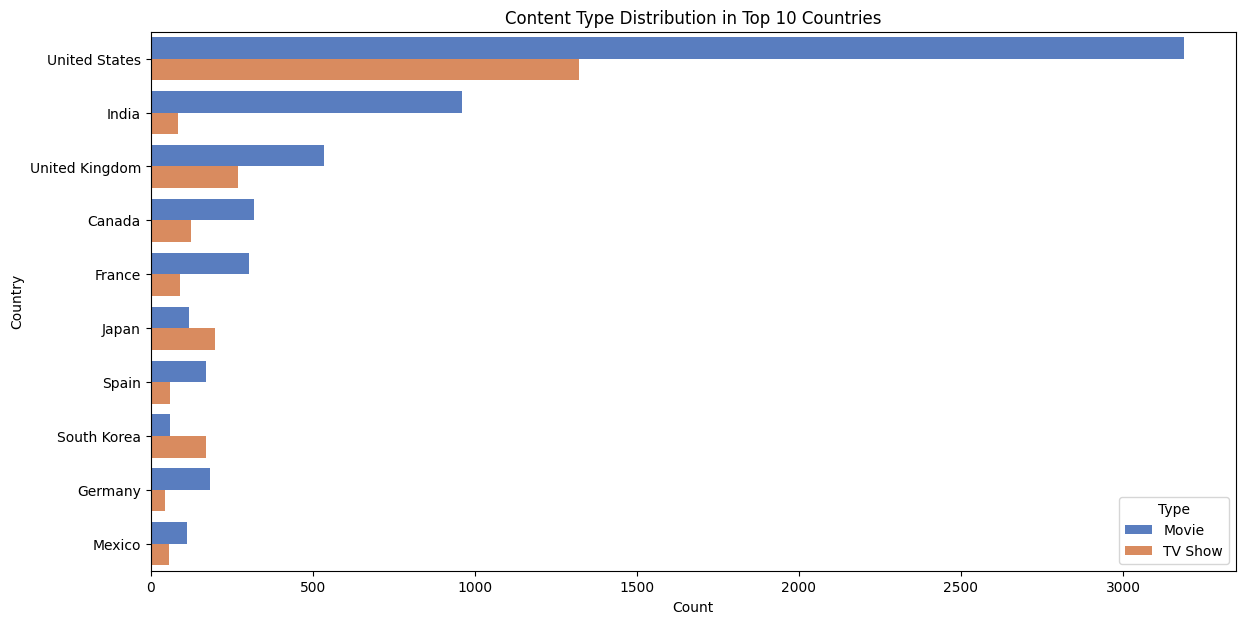

In [34]:
 # How does country distribution vary by content type?
# Explode country list for accurate counts
df_countries = df.dropna(subset=['country']).copy()
df_countries['country'] = df_countries['country'].str.split(',').apply(lambda x: [c.strip() for c in x])
df_countries = df_countries.explode('country')

top_countries = df_countries['country'].value_counts().head(10).index.tolist()
df_top_countries = df_countries[df_countries['country'].isin(top_countries)]

plt.figure(figsize=(14,7))
sns.countplot(data=df_top_countries, y='country', hue='type', palette='muted', order=top_countries)
plt.title('Content Type Distribution in Top 10 Countries')
plt.xlabel('Count')
plt.ylabel('Country')
plt.legend(title='Type')
plt.show()


In [35]:
# The US leads in both Movies and TV Shows, while countries like India and UK show stronger representation in movies

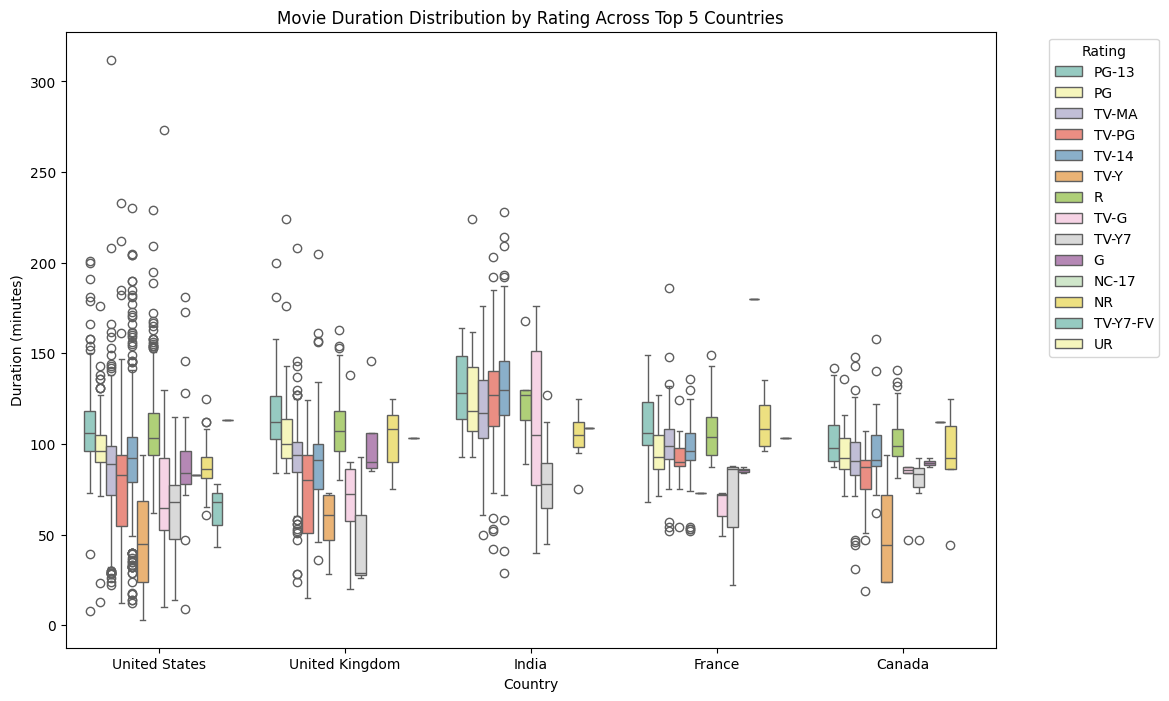

In [36]:
# Relationship between duration, rating, and country for Movies


# Filter movies with valid duration and country
movies = df[(df['type'] == 'Movie') & df['duration_num'].notna() & df['country'].notna()]

# Explode countries
movies['country'] = movies['country'].str.split(',').apply(lambda x: [c.strip() for c in x])
movies = movies.explode('country')

# Top 5 countries by movie count
top_countries = movies['country'].value_counts().head(5).index.tolist()
movies_top = movies[movies['country'].isin(top_countries)]

plt.figure(figsize=(12,8))
sns.boxplot(data=movies_top, x='country', y='duration_num', hue='rating', palette='Set3')
plt.title('Movie Duration Distribution by Rating Across Top 5 Countries')
plt.xlabel('Country')
plt.ylabel('Duration (minutes)')
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


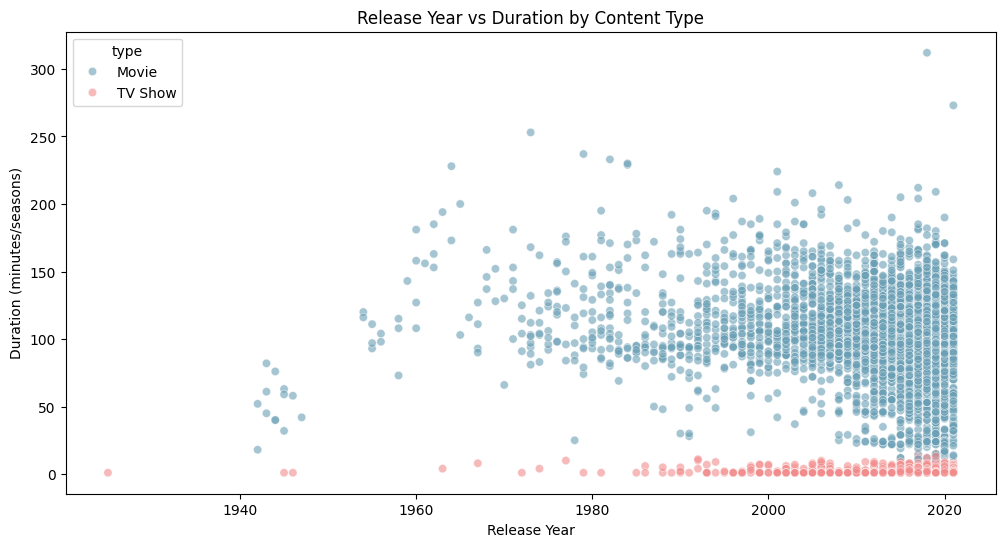

In [37]:
# : Scatter plot of release year, duration, and type
df_filtered = df.dropna(subset=['release_year', 'duration_num'])
plt.figure(figsize=(12,6))
sns.scatterplot(data=df_filtered, x='release_year', y='duration_num', hue='type', alpha=0.6, palette=['#6a9fb5', '#f28c8c'])
plt.title('Release Year vs Duration by Content Type')
plt.xlabel('Release Year')
plt.ylabel('Duration (minutes/seasons)')
plt.show()

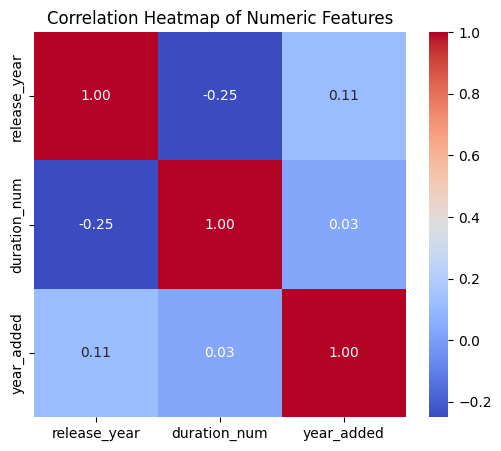

In [38]:
# Correlation heatmap of numeric columns

import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = ['release_year', 'duration_num', 'year_added']
corr = df[numeric_cols].corr()

plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


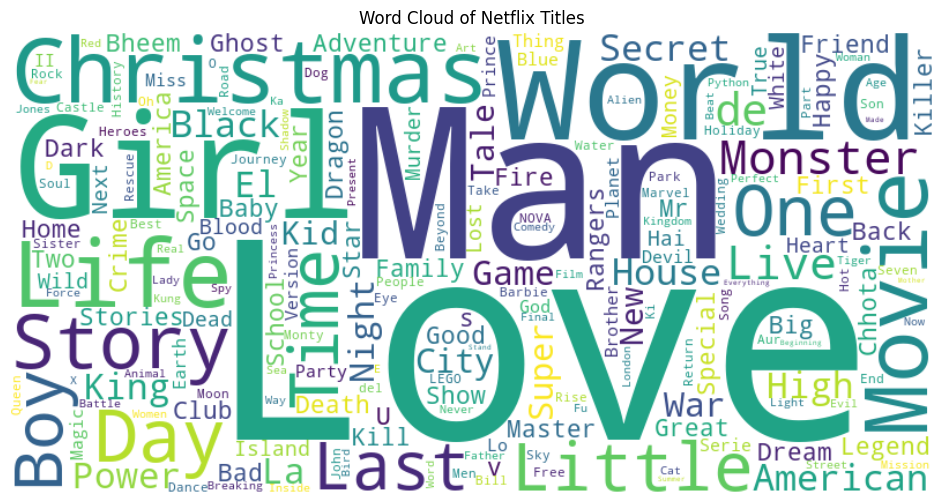

In [39]:
 # create a word cloud for Netflix titles using the wordcloud librar
from wordcloud import WordCloud
text = " ".join(df['title'].dropna().values)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', collocations=False).generate(text)

# Plot
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Netflix Titles')
plt.show()

In [40]:
import plotly.graph_objects as go

# Total titles
total_titles = len(df)

# Titles added in last 5 years (2018-2023)
recent_titles = df[df['year_added'] >= 2018].shape[0]

# Titles with popular ratings (e.g., 'TV-MA', 'PG-13', 'R')
popular_ratings = df[df['rating'].isin(['TV-MA', 'PG-13', 'R'])].shape[0]

# Titles from top 3 countries (USA, India, UK)
top_countries = ['United States', 'India', 'United Kingdom']
df['country'] = df['country'].fillna('')
df['country_list'] = df['country'].str.split(',').apply(lambda x: [c.strip() for c in x])
titles_top_countries = df[df['country_list'].apply(lambda x: any(c in top_countries for c in x))].shape[0]

# Funnel chart
fig = go.Figure(go.Funnel(
    y=["Total Titles", "Titles Added 2018+", "Popular Ratings", "Top 3 Countries"],
    x=[total_titles, recent_titles, popular_ratings, titles_top_countries],
    textinfo="value+percent initial"
))

fig.update_layout(title="Netflix Content Funnel Analysis")
fig.show()


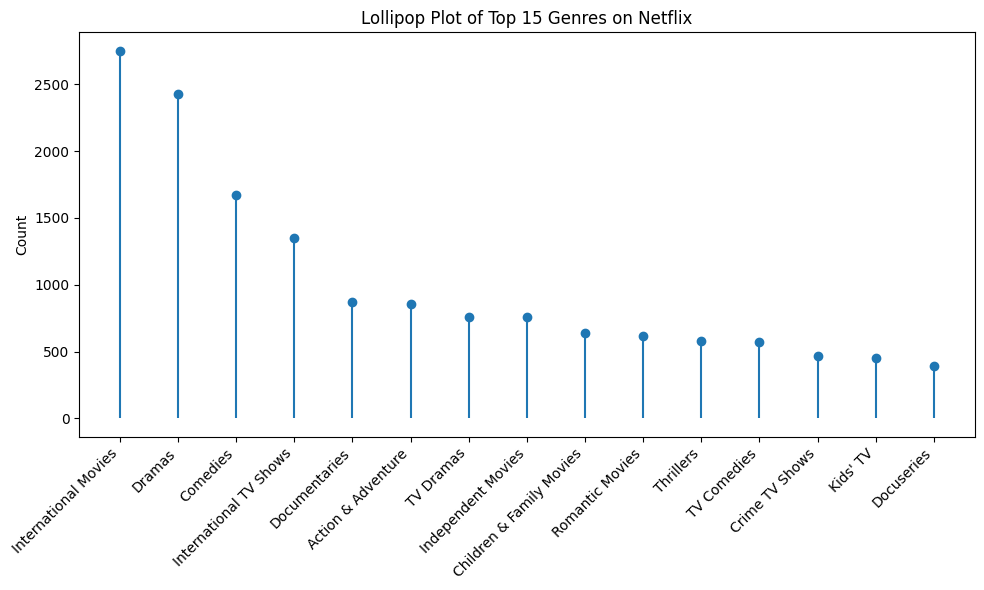

In [41]:
#lollipop/stem plot for Genres vs their count on Netflix

# Split genres and explode
df['listed_in'] = df['listed_in'].str.split(',').apply(lambda x: [i.strip() for i in x])
genres = df.explode('listed_in')

# Count genres
genre_counts = genres['listed_in'].value_counts().reset_index()
genre_counts.columns = ['Genre', 'Count']

# Plot lollipop chart for top 15 genres
top_genres = genre_counts.head(15)

plt.figure(figsize=(10,6))
plt.stem(top_genres['Genre'], top_genres['Count'], basefmt=" ", use_line_collection=True)
plt.xticks(rotation=45, ha='right')
plt.title('Lollipop Plot of Top 15 Genres on Netflix')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [42]:
import plotly.express as px

# Filter for India and drop missing or 'No Data' in director or missing title
netflix_india = df[df['country'].notna() & df['country'].str.contains('India')]
netflix_india_clean = netflix_india.dropna(subset=['director', 'title'])
netflix_india_clean = netflix_india_clean[netflix_india_clean['director'].str.strip().str.lower() != 'no data']

fig = px.treemap(
    netflix_india_clean,
    path=['country', 'director'],
    color='director',
    hover_data=['director', 'title'],
    color_continuous_scale='Purples'
)

fig.update_layout(title="Treemap: Netflix Titles by Director in India")
fig.show()


In [43]:
# What is a Treemap?
# A treemap is a visualization that displays hierarchical (tree-structured) data as nested rectangles.

# Each rectangle’s size corresponds to a quantitative value (here, number of titles by director).

# The color can represent another dimension (here, directors colored distinctly for clarity).

# It’s great for showing proportions and distributions within categories and subcategories.

In [44]:
# What does this plot say?
# The largest rectangles represent directors with the most Netflix titles in India.

# It shows the distribution of content across different directors in India.

# You can easily see which directors dominate the Indian Netflix library.

# Hovering over each rectangle reveals specific directors and their titles.

# Helps identify prolific content creators and possible concentration or diversity of directors.

In [45]:
 # Animated Bar Chart Race: Content Over Years

df_anim = df.dropna(subset=['country', 'date_added'])
df_anim['year_added'] = pd.to_datetime(df_anim['date_added']).dt.year
df_anim = df_anim[df_anim['year_added'].notna()]

top_countries = df_anim['country'].value_counts().nlargest(10).index
df_anim = df_anim[df_anim['country'].isin(top_countries)]

fig = px.bar(
    df_anim,
    x='country',
    animation_frame='year_added',
    color='country',
    title='🏁 Netflix Content by Country Over the Years',
    labels={'country': 'Country'},
)
fig.update_layout(width=900, height=600)
fig.show()


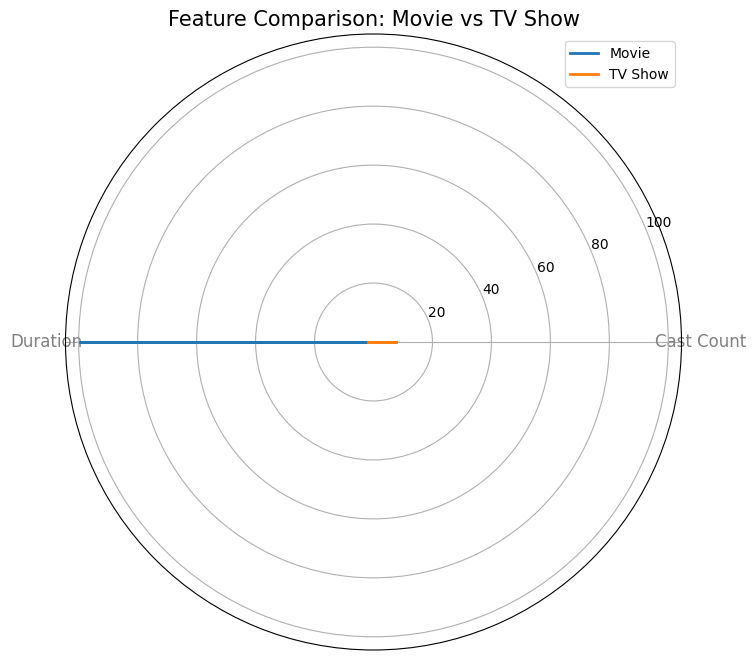

In [46]:
from math import pi
import matplotlib.pyplot as plt

radar_df = df.copy()
radar_df['cast_count'] = radar_df['cast'].fillna('').apply(lambda x: len(x.split(',')) if x else 0)
radar_df['duration_num'] = radar_df['duration'].str.extract('(\d+)').astype(float)

agg_df = radar_df.groupby('type')[['cast_count', 'duration_num']].mean().reset_index()

labels = ['Cast Count', 'Duration']
movie = agg_df.iloc[0, 1:].values
tv = agg_df.iloc[1, 1:].values

angles = [n / float(len(labels)) * 2 * pi for n in range(len(labels))]
movie = list(movie) + [movie[0]]
tv = list(tv) + [tv[0]]
angles += [angles[0]]

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
plt.xticks(angles[:-1], labels, color='grey', size=12)
ax.plot(angles, movie, linewidth=2, linestyle='solid', label='Movie')
ax.plot(angles, tv, linewidth=2, linestyle='solid', label='TV Show')
ax.fill(angles, movie, alpha=0.3)
ax.fill(angles, tv, alpha=0.3)
plt.title('Feature Comparison: Movie vs TV Show', size=15)
plt.legend()
plt.show()


In [47]:
# Release Year vs Duration vs Rating with Content Type and Count of Cast Members >> 3d

import plotly.express as px
import pandas as pd

# Helper to extract numeric duration
def extract_duration_num(val):
    if pd.isna(val):
        return None
    if 'Season' in val:
        return int(val.split(' ')[0])
    elif 'min' in val:
        return int(val.split(' ')[0])
    return None

df['duration_num'] = df['duration'].apply(extract_duration_num)
df['cast_count'] = df['cast'].fillna('').apply(lambda x: len(x.split(',')) if x else 0)

# Simplified rating level mapping
rating_map = {'TV-MA': 5, 'PG-13': 4, 'R': 3, 'TV-14': 2, 'TV-PG': 1}
df['rating_num'] = df['rating'].map(rating_map).fillna(0)

# Drop NA rows for essential 3D plot dimensions
df_3d = df.dropna(subset=['release_year', 'duration_num', 'rating_num'])

# Large and impactful 3D plot
fig = px.scatter_3d(
    df_3d,
    x='release_year',
    y='duration_num',
    z='rating_num',
    color='type',
    size='cast_count',
    size_max=30,
    opacity=0.85,
    hover_name='title',
    hover_data={
        'rating': True,
        'duration': True,
        'cast_count': True,
        'release_year': False,
        'duration_num': False,
        'rating_num': False
    },
    color_discrete_map={'Movie': '#ff6f61', 'TV Show': '#6b5b95'},
    title=' Netflix Content — Year vs Duration vs Rating',
    labels={
        'release_year': 'Release Year',
        'duration_num': 'Duration (minutes/seasons)',
        'rating_num': 'Rating Level',
        'type': 'Content Type'
    }
)

# High-resolution layout
fig.update_layout(
    width=1200,
    height=800,
    scene=dict(
        xaxis=dict(
            backgroundcolor="#fdf6ec", title_font=dict(size=14),
            gridcolor="white", zerolinecolor="gray"
        ),
        yaxis=dict(
            backgroundcolor="#e9f7ef", title_font=dict(size=14),
            gridcolor="white", zerolinecolor="gray"
        ),
        zaxis=dict(
            backgroundcolor="#e8eaf6", title_font=dict(size=14),
            gridcolor="white", zerolinecolor="gray"
        ),
    ),
    margin=dict(l=10, r=10, b=10, t=80),
    font=dict(family="Arial", size=12),
    legend=dict(
        x=0.8, y=1.05, bgcolor="rgba(255,255,255,0.7)", borderwidth=1
    )
)

fig.show()
